In [6]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# VLAGUN_TOTAL_BASINS_35 - Mało przypadków i dużo zmiennych

In [7]:
df = pd.read_csv('VLagun_Total_Basins_35.csv')
X = df.iloc[:, 1:-1].values
Y = df.iloc[:, -1].values
results = {}

In [8]:
seed = 0
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)

Shape of X_train: (108, 35)
Shape of X_test: (47, 35)


In [9]:
def confusion_mat(Y_pred, Y_test):
    plt.figure()
    sns.set(font_scale=1.5)
    cm = confusion_matrix(Y_pred, Y_test)
    sns.heatmap(cm, annot=True, fmt='g')
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

### AdaBoost

Accuracy of the result is: 0.7872340425531915


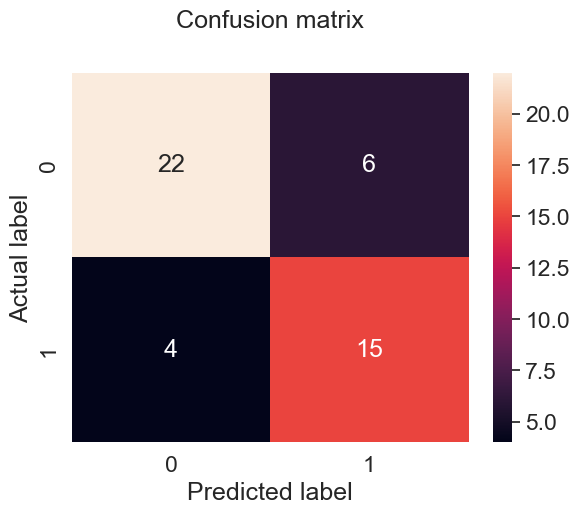

In [10]:
clf = AdaBoostClassifier(n_estimators=100, random_state=1)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
results['AdaBoost'] = np.mean(predicted == y_test)
print(f'Accuracy of the result is: {results["AdaBoost"]}')

confusion_mat(predicted, y_test)

### GBM

Accuracy of the result is: 0.7659574468085106


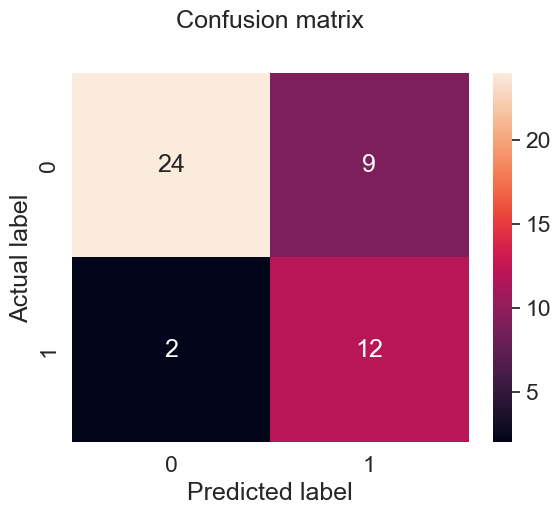

In [11]:
clf = GradientBoostingClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
results['GBM'] = np.mean(predicted == y_test)
print(f'Accuracy of the result is: {results["GBM"]}')

confusion_mat(predicted, y_test)

### XGBoost

Accuracy of the result is: 0.7659574468085106


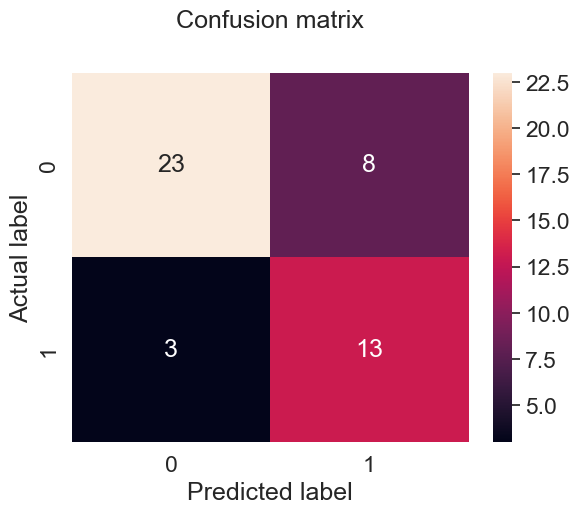

In [12]:
clf = XGBClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
results['XGBoost'] = np.mean(predicted == y_test)
print(f'Accuracy of the result is: {results["XGBoost"]}')

confusion_mat(predicted, y_test)

### Light GMB

[LightGBM] [Info] Number of positive: 44, number of negative: 64
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1034
[LightGBM] [Info] Number of data points in the train set: 108, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.407407 -> initscore=-0.374693
[LightGBM] [Info] Start training from score -0.374693
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\Users\Arek\PycharmProjects\Machine-Learning\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


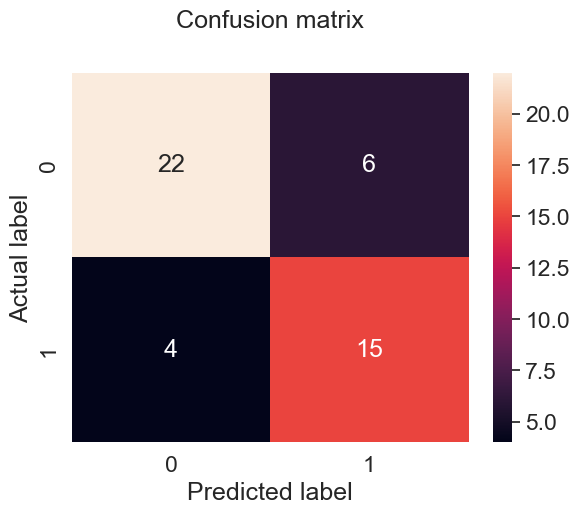

In [13]:
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
results['LightGMB'] = np.mean(predicted == y_test)
print(f'Accuracy of the result is: {results["LightGMB"]}')

confusion_mat(predicted, y_test)

### Cat Boost

Learning rate set to 0.032901
0:	learn: 0.6773385	total: 140ms	remaining: 13.9s
1:	learn: 0.6541455	total: 143ms	remaining: 7.03s
2:	learn: 0.6372645	total: 146ms	remaining: 4.73s
3:	learn: 0.6199722	total: 150ms	remaining: 3.59s
4:	learn: 0.6082553	total: 152ms	remaining: 2.89s
5:	learn: 0.5942793	total: 154ms	remaining: 2.41s
6:	learn: 0.5816591	total: 156ms	remaining: 2.08s
7:	learn: 0.5668123	total: 158ms	remaining: 1.82s
8:	learn: 0.5522527	total: 160ms	remaining: 1.62s
9:	learn: 0.5392596	total: 162ms	remaining: 1.46s
10:	learn: 0.5281242	total: 164ms	remaining: 1.32s
11:	learn: 0.5182021	total: 166ms	remaining: 1.22s
12:	learn: 0.5080748	total: 168ms	remaining: 1.12s
13:	learn: 0.4966230	total: 170ms	remaining: 1.04s
14:	learn: 0.4902123	total: 171ms	remaining: 970ms
15:	learn: 0.4808916	total: 173ms	remaining: 909ms
16:	learn: 0.4739783	total: 175ms	remaining: 854ms
17:	learn: 0.4636393	total: 177ms	remaining: 805ms
18:	learn: 0.4528959	total: 178ms	remaining: 760ms
19:	learn: 

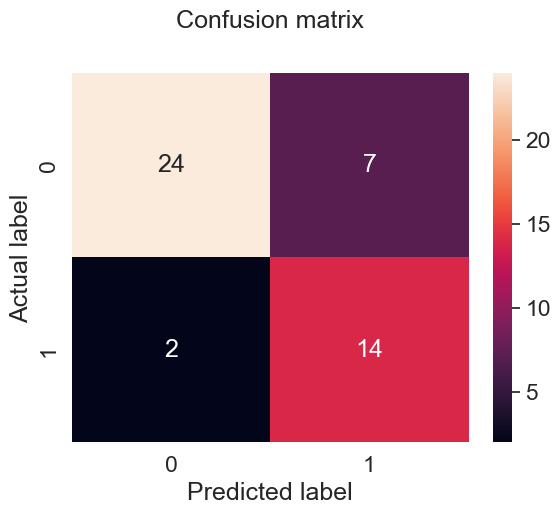

In [14]:
clf = CatBoostClassifier(iterations=100)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
results['CatBoost'] = np.mean(predicted == y_test)
print(f'Accuracy of the result is: {results["CatBoost"]}')

confusion_mat(predicted, y_test)

In [15]:
def make_table(results):
    df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
    df = df.round(3)
    df = df.transpose()
    fig, ax = plt.subplots(figsize=(8, 2))
    ax.axis('off')
    min_val = df.iloc[0].min()
    max_val = df.iloc[0].max()
    cell_colors = []
    for val in df.iloc[0]:
        if val == max_val:
            cell_colors.append('lightgreen')
        elif val == min_val:
            cell_colors.append('lightcoral')
        else:
            cell_colors.append('white')
    table = ax.table(cellText=df.values,
                     colLabels=df.columns,
                     rowLabels=df.index,
                     cellColours=[cell_colors],
                     loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 2)
    plt.show()

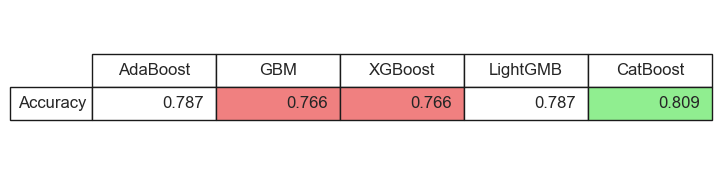

In [16]:
make_table(results)